### Libararies Pip Installation
Install the following libraries using the pip command, if dependencies fail.
- pip install --upgrade pip
- pip install pandas
- pip install numpy
- pip install seaborn
- pip install sklearn
- pip install tensorflow
- pip install plotnine

In [144]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from plotnine.data import economics
from plotnine import ggplot, aes, geom_line,geom_point
from factor_analyzer import FactorAnalyzer
#Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import tensorflow as tf

In [145]:
path='../Data/20210412_trainingdata.csv'
#Dataframe of Training Data
df_train=pd.read_csv(path)

In [146]:
df_train.head(10)

,ID,pred01,pred02,pred03,pred04,pred05,pred06,pred07,class01,class02
0,1,12177002,15.363654,2914.525169,519.122069,28.637770,825.810568,3.655287,1.0,1.0
1,4,7646914,16.198032,2897.555949,513.199695,67.072859,2025.569383,9.324969,1.0,2.0
2,6,14018536,9.228396,4610.928187,829.525856,0.271339,1.824333,0.000000,3.0,0.0
3,13,11083451,11.635278,3148.394485,563.979245,24.686547,888.556073,3.916099,2.0,1.0
4,14,9203570,12.432255,3414.348857,616.058845,5.852061,1.475134,0.000000,3.0,0.0
5,15,8833882,11.388442,3212.946223,589.712328,0.694923,4.285932,0.000000,3.0,0.0
6,18,7691159,11.254293,3006.102730,536.528171,37.580517,854.395790,3.404692,1.0,2.0
7,21,11233484,8.988270,3139.510338,563.830916,0.392651,2.564313,0.000000,2.0,0.0
8,22,10929715,13.363228,3400.163945,626.590909,0.492922,4.161372,0.000000,3.0,0.0
9,23,12216059,7.010579,3173.853161,565.735654,0.439199,2.940537,0.000000,2.0,0.0


In [147]:
df_train['pred02'].iloc[np.where(df_train['pred02']<1)]=df_train['pred02'].iloc[np.where(df_train['pred02']<1)]*100

In [148]:
df_train.describe()

,ID,pred01,pred02,pred03,pred04,pred05,pred06,pred07,class01,class02
count,649.000000,6.490000e+02,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,638.000000,638.000000
mean,650.397535,8.964486e+06,10.715462,3078.629311,548.636852,16.529460,392.924060,1.642732,1.467085,0.623824
std,372.783937,2.358324e+06,3.947530,166.877398,30.682667,17.320079,444.526089,2.011791,0.572538,0.576513
min,1.000000,6.522810e+05,2.915393,2282.556608,404.843171,0.158509,0.671472,0.000000,0.000000,0.000000
25%,333.000000,7.621147e+06,7.807440,2989.192605,532.511850,0.853852,4.561605,0.000000,1.000000,0.000000
50%,631.000000,8.669770e+06,10.336000,3094.916565,550.402795,13.127797,279.119502,0.981889,1.000000,1.000000
75%,970.000000,1.002319e+07,12.911922,3163.558772,563.724852,27.584226,659.506013,2.724287,2.000000,1.000000
max,1299.000000,3.024862e+07,30.389986,4629.276796,829.525856,117.091699,3008.371327,14.069453,3.000000,2.000000


<AxesSubplot:xlabel='class01', ylabel='Density'>

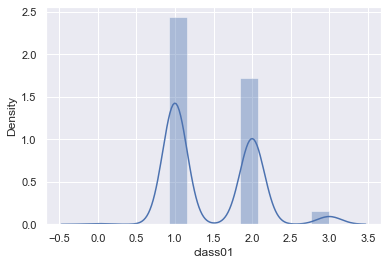

In [149]:
sns.distplot(df_train['class01'])

<AxesSubplot:xlabel='class02', ylabel='Density'>

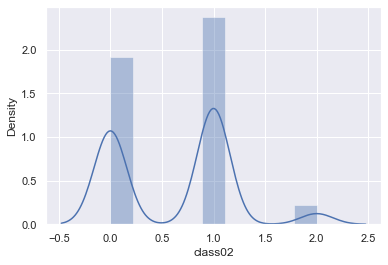

In [150]:
sns.distplot(df_train['class02'])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


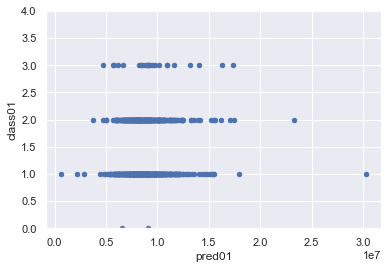

In [151]:
#scatter plot pred01/class01
var = 'pred01'
data = pd.concat([df_train['class01'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='class01', ylim=(0,4));

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


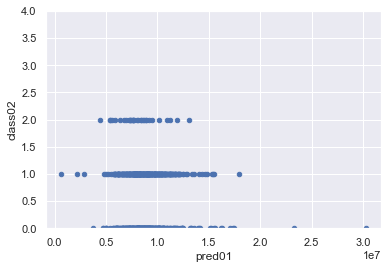

In [152]:
#scatter plot pred01/class02
var = 'pred01'
data = pd.concat([df_train['class02'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='class02', ylim=(0,4));

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


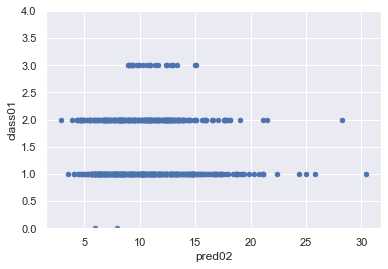

In [153]:
#scatter plot pred02/class01
var = 'pred02'
data = pd.concat([df_train['class01'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='class01', ylim=(0,4));

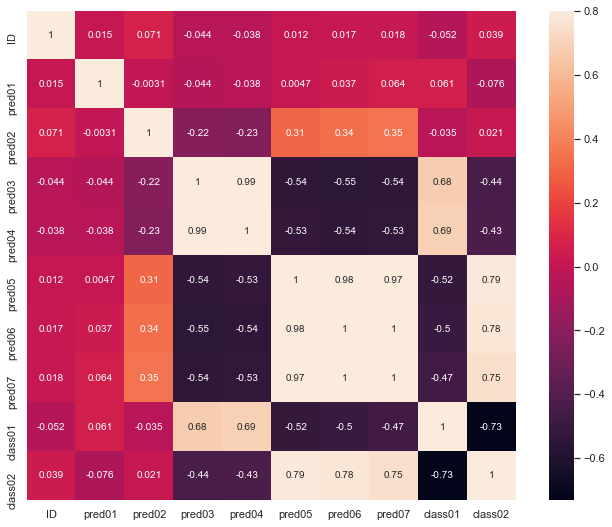

In [154]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True,annot=True);
#use pred06 not 5 and not 7

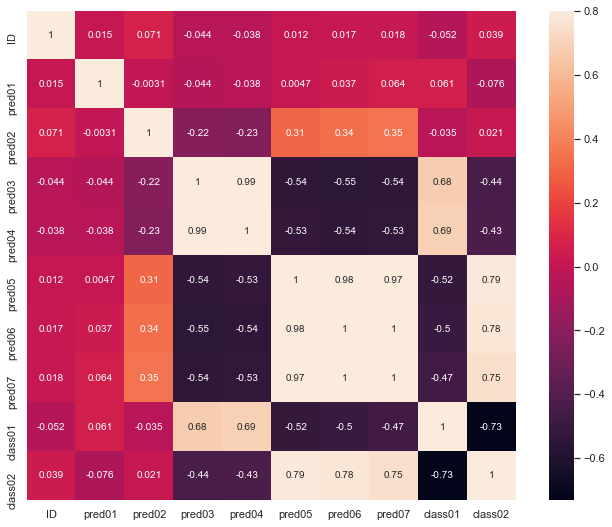

In [155]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True,annot=True);
#use pred06 not 5 and not 7

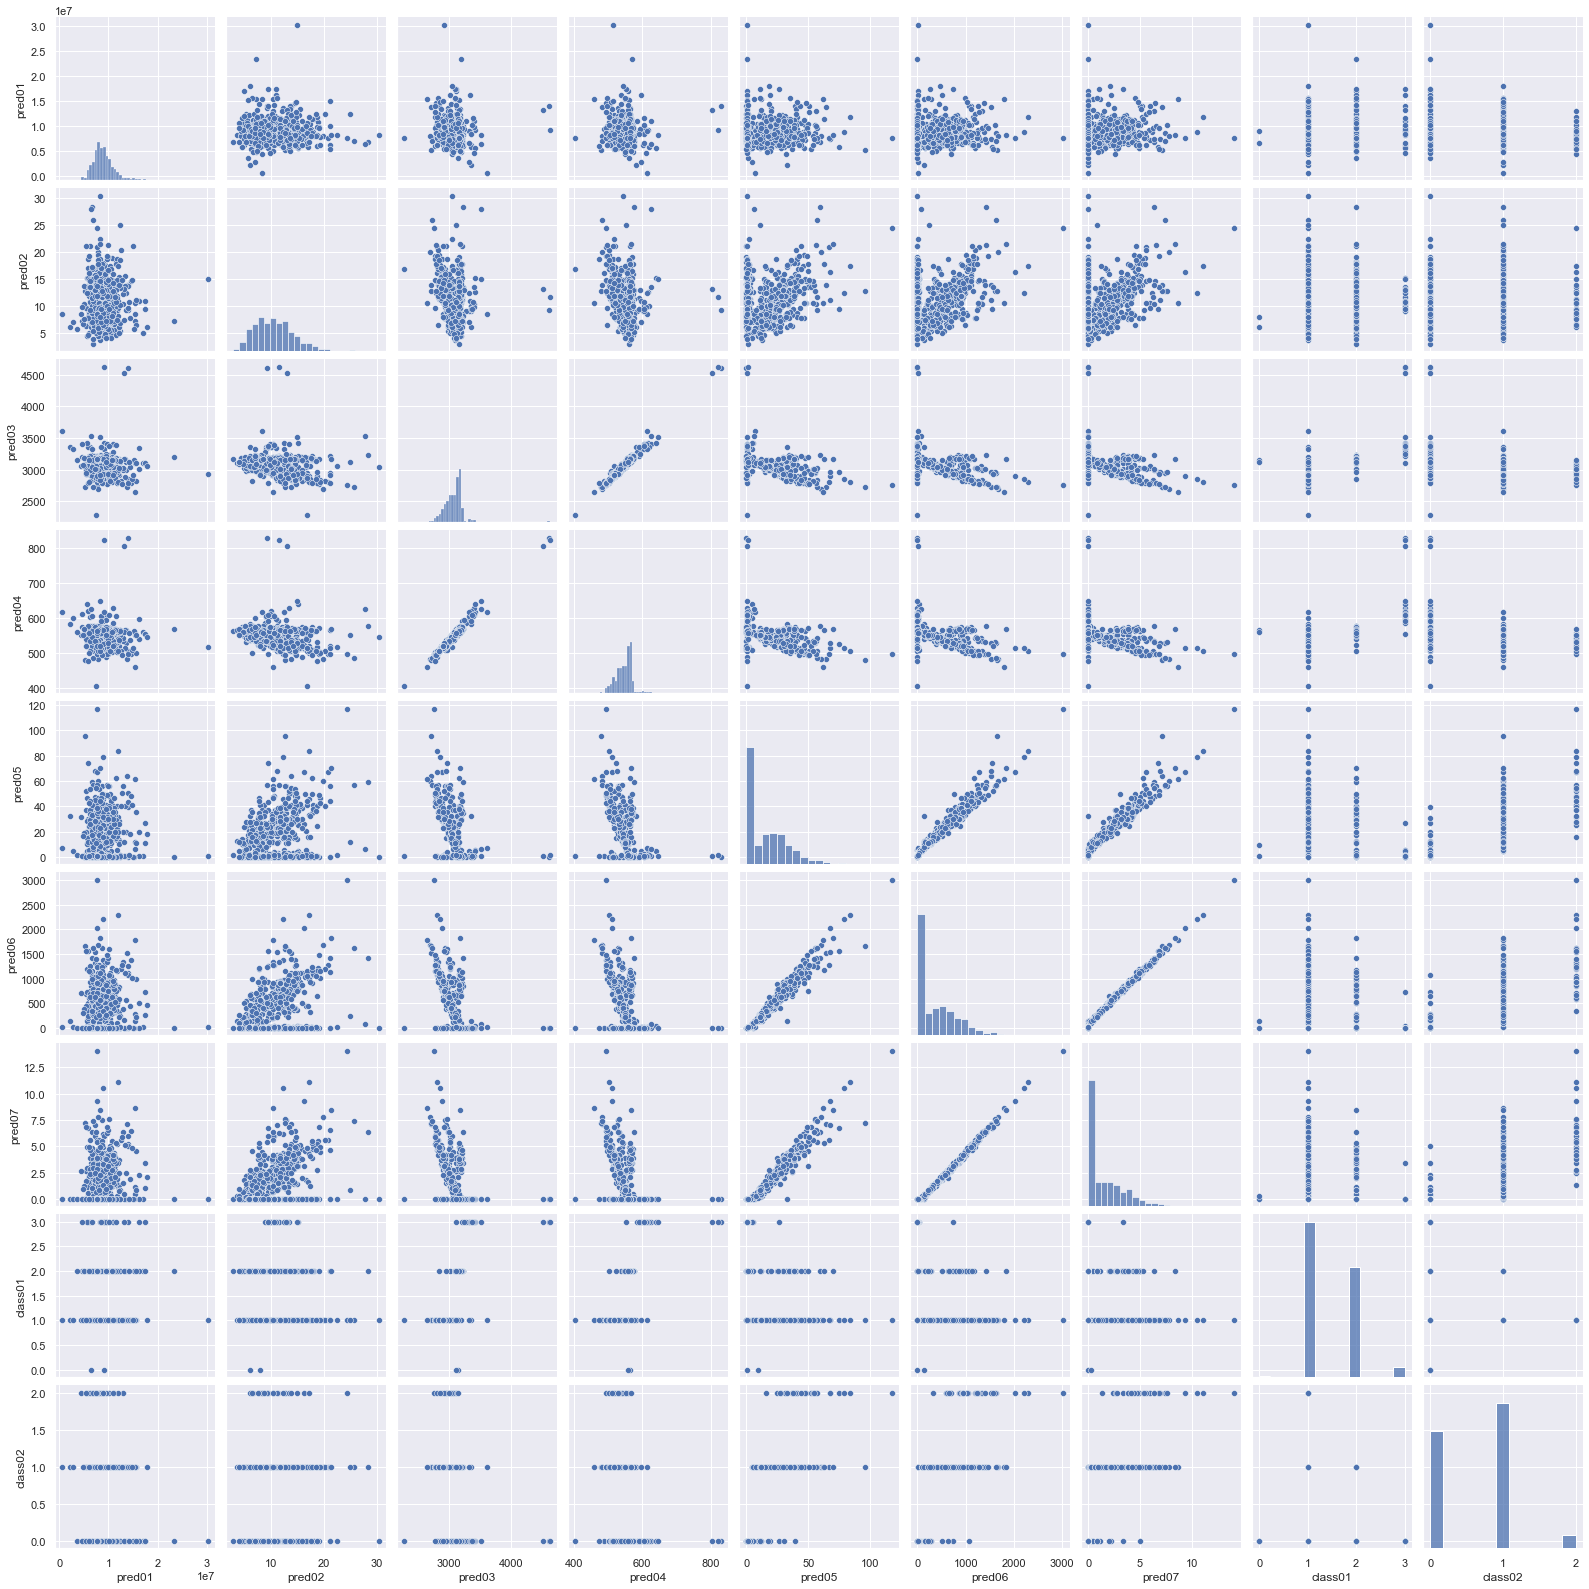

In [156]:
#scatterplot
sns.set()
df=df_train.drop(['ID'],axis=1)
sns.pairplot(df)
plt.show()

In [157]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
class01,11,0.016949
class02,11,0.016949
ID,0,0.000000
pred01,0,0.000000
pred02,0,0.000000
pred03,0,0.000000
pred04,0,0.000000
pred05,0,0.000000
pred06,0,0.000000
pred07,0,0.000000


In [158]:
df_train=df_train.dropna()
df_train.isnull().sum().max()

0

## Univariate analysis


In [159]:
#histogram and normal probability plot
def normalcheck(df_train,col):
    sns.distplot(df_train[col], fit=norm);
    fig = plt.figure()
    res = stats.probplot(df_train[col], plot=plt)

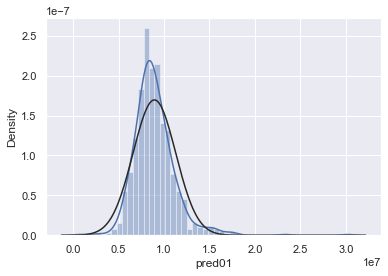

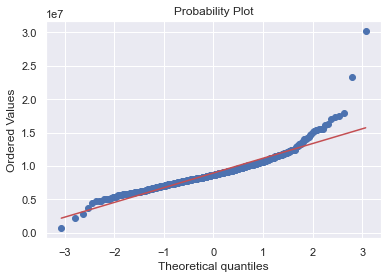

In [160]:
normalcheck(df_train,'pred01')

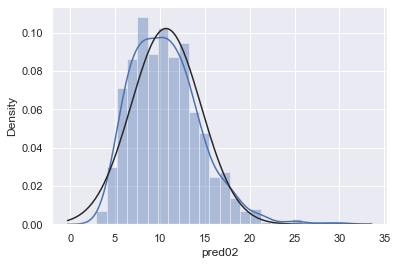

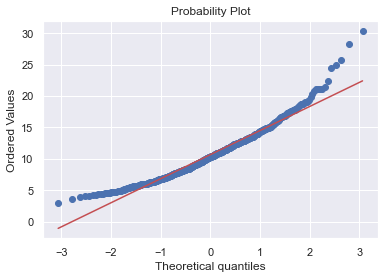

In [161]:
normalcheck(df_train,'pred02')

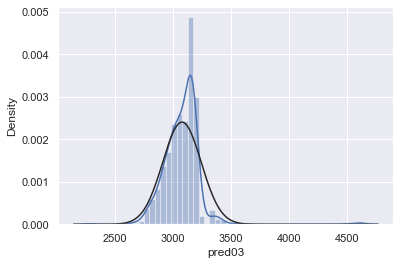

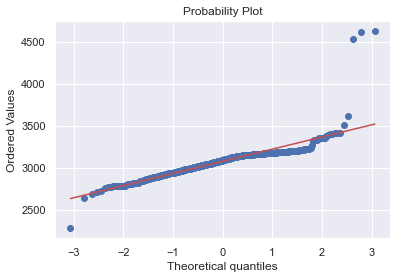

In [162]:
normalcheck(df_train,'pred03')

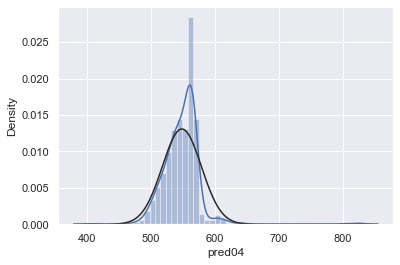

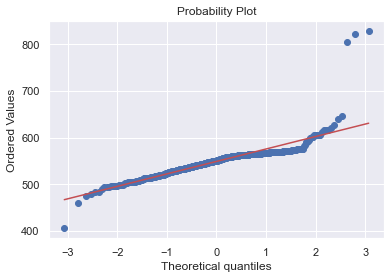

In [163]:
normalcheck(df_train,'pred04')

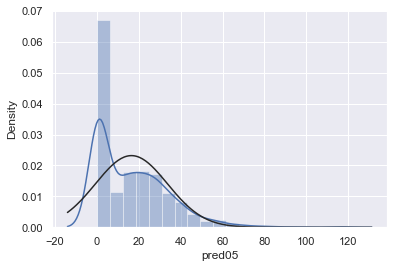

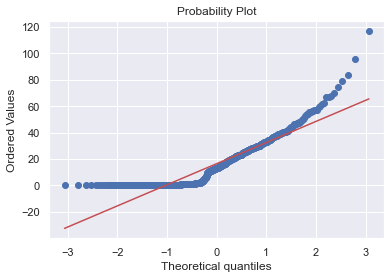

In [164]:
normalcheck(df_train,'pred05')

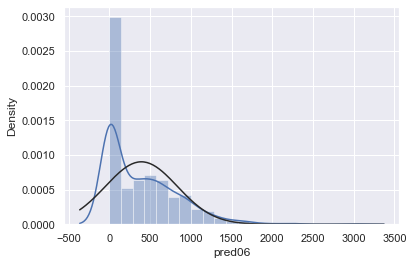

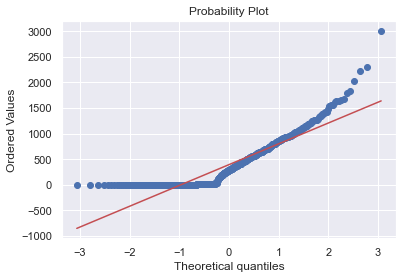

In [165]:

normalcheck(df_train,'pred06')

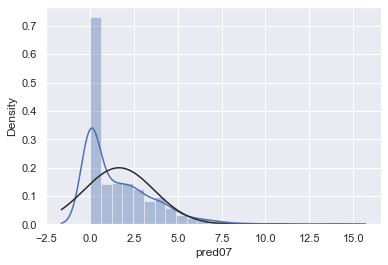

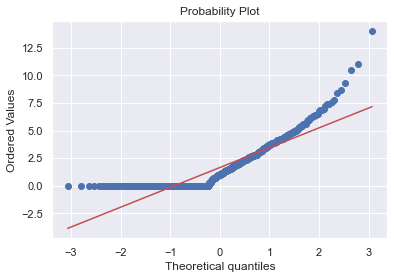

In [166]:
normalcheck(df_train,'pred07')

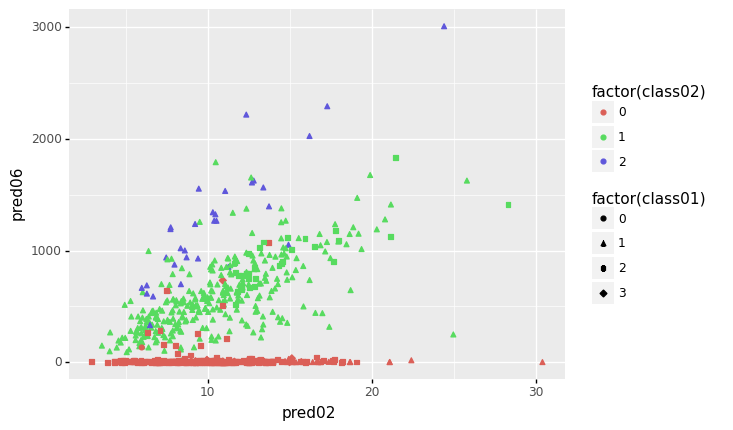

<ggplot: (-9223371939437099032)>

In [167]:
#### Geometric object to use for drawing
(
    ggplot(df_train)  # What data to use
    + aes(x='pred02', y='pred06')  # What variable to use
    + geom_point(aes(color='factor(class02)',shape='factor(class01)'))
)

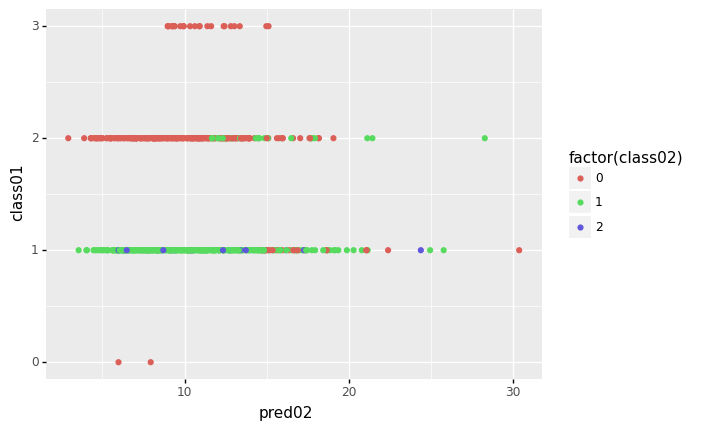

<ggplot: (-9223371939437079676)>

In [168]:
#### Geometric object to use for drawing
(
    ggplot(df_train)  # What data to use
    + aes(x='pred02', y='class01')  # What variable to use
    + geom_point(aes(color='factor(class02)'))
)

In [169]:
df=df_train.drop(['ID','class01','class02'],axis=1)
df.head()

,pred01,pred02,pred03,pred04,pred05,pred06,pred07
0,12177002,15.363654,2914.525169,519.122069,28.637770,825.810568,3.655287
1,7646914,16.198032,2897.555949,513.199695,67.072859,2025.569383,9.324969
2,14018536,9.228396,4610.928187,829.525856,0.271339,1.824333,0.000000
3,11083451,11.635278,3148.394485,563.979245,24.686547,888.556073,3.916099
4,9203570,12.432255,3414.348857,616.058845,5.852061,1.475134,0.000000


In [170]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value
#In this Bartlett ’s test, the p-value is 0. The test was statistically significant,
#indicating that the observed correlation matrix is not an identity matrix.



(8077.992981836241, 0.0)

In [171]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df)
kmo_model
#The overall KMO for our data is 0.69, which is not good

0.6938054869481591

In [172]:
kmo_all

array([0.02669646, 0.76987093, 0.65949994, 0.65561258, 0.83762645,
       0.65830774, 0.68759592])

In [173]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.fit(df)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([4.01571514e+00, 1.10468969e+00, 1.00100890e+00, 8.33023231e-01,
       2.96385823e-02, 1.40028688e-02, 1.92158100e-03])

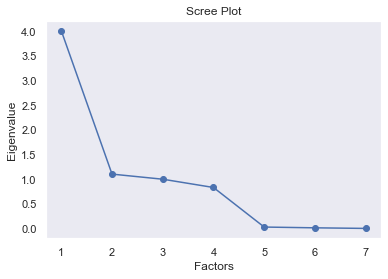

In [174]:
# Create scree plot using matplotlib
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()
#factor above 1 to be taken

In [175]:
fa = FactorAnalyzer()
fa.set_params(n_factors=3, rotation='varimax')
fa.fit(df)
loadings = fa.loadings_
loadings

array([[ 0.0051162 , -0.01213885,  0.99742822],
       [ 0.31966406, -0.15240231, -0.00817346],
       [-0.31512846,  0.93569142, -0.01444025],
       [-0.30208442,  0.95111973, -0.00896091],
       [ 0.94217904, -0.24482225, -0.01827717],
       [ 0.96791802, -0.25063501,  0.01613715],
       [ 0.96857203, -0.2425117 ,  0.04179798]])

In [176]:
fa

FactorAnalyzer(rotation='varimax', rotation_kwargs={})

In [177]:
fa.get_factor_variance()
#Total 86% cumulative Variance explained by the 2 factors.

(array([3.05547064, 1.98508875, 0.99756022]),
 array([0.43649581, 0.28358411, 0.1425086 ]),
 array([0.43649581, 0.72007991, 0.86258852]))

### Univariate Selection

Statistical tests can be used to select those features that have the strongest relationship with the output variable.

Using chi-squared (chi²) statistical test for non-negative features to select best features

In [193]:
path='../Data/20210412_trainingdata.csv'

#Dataframe of Training Data
df=pd.read_csv(path)
print('\nNumber of NUll values in the data',df.isnull().sum())

#Drops the Nan Values
df=df.dropna()
df['pred02'].iloc[np.where(df['pred02']<1)]=df['pred02'].iloc[np.where(df['pred02']<1)]*100
#Splitting class01 and class02 in two variables

class01=df['class01']
class02=df['class02']

#one hot encoding each classes
class01=tf.keras.utils.to_categorical(
    class01, num_classes=4, dtype='float32')
class02=tf.keras.utils.to_categorical(
    class02, num_classes=4, dtype='float32')

#Concatenates the one hot encoded vectors
encoded_class=np.concatenate((class01,class02),axis=1)
df


Number of NUll values in the data ID          0
pred01      0
pred02      0
pred03      0
pred04      0
pred05      0
pred06      0
pred07      0
class01    11
class02    11
dtype: int64


,ID,pred01,pred02,pred03,pred04,pred05,pred06,pred07,class01,class02
0,1,12177002,15.363654,2914.525169,519.122069,28.637770,825.810568,3.655287,1.0,1.0
1,4,7646914,16.198032,2897.555949,513.199695,67.072859,2025.569383,9.324969,1.0,2.0
2,6,14018536,9.228396,4610.928187,829.525856,0.271339,1.824333,0.000000,3.0,0.0
3,13,11083451,11.635278,3148.394485,563.979245,24.686547,888.556073,3.916099,2.0,1.0
4,14,9203570,12.432255,3414.348857,616.058845,5.852061,1.475134,0.000000,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...
644,1294,7607722,13.550007,3159.971258,563.407572,0.960470,5.329181,0.000000,2.0,0.0
645,1295,15604914,11.119369,3102.274188,550.265612,11.021495,215.767012,0.803803,2.0,0.0
646,1296,8328749,7.899799,2906.701221,517.683089,22.810706,565.064675,2.220959,1.0,1.0
647,1298,11026059,14.119090,2907.881036,518.492817,35.301832,945.928315,4.189935,1.0,1.0


In [194]:
def data_preprocessing(df):
    '''The Function Normalizes the data for each column.
        Input is the training data frame
        and the output Nomralized Data frame'''
    df['pred02'].iloc[np.where(df['pred02']<1)]=df['pred02'].iloc[np.where(df['pred02']<1)]*100
    df['pred05']=np.log(df['pred05'].values+1)
    df['pred06']=np.log(df['pred06'].values+1)
    df=df.drop(['ID','class01','class02','pred07'],axis=1)
    df=df.dropna()

    return df

df_train=data_preprocessing(df)
df_train

,pred01,pred02,pred03,pred04,pred05,pred06
0,12177002,15.363654,2914.525169,519.122069,3.389050,6.717576
1,7646914,16.198032,2897.555949,513.199695,4.220579,7.614100
2,14018536,9.228396,4610.928187,829.525856,0.240071,1.038272
3,11083451,11.635278,3148.394485,563.979245,3.245967,6.790723
4,9203570,12.432255,3414.348857,616.058845,1.924549,0.906294
...,...,...,...,...,...,...
644,7607722,13.550007,3159.971258,563.407572,0.673184,1.845171
645,15604914,11.119369,3102.274188,550.265612,2.486696,5.378823
646,8328749,7.899799,2906.701221,517.683089,3.170135,6.338708
647,11026059,14.119090,2907.881036,518.492817,3.591868,6.853223


In [195]:
class01=df['class01']
class02=df['class02']

In [196]:
bestfeatures2 = SelectKBest(score_func=chi2, k='all')
fit2 = bestfeatures2.fit(df_train,class02)
bestfeatures1 = SelectKBest(score_func=chi2, k='all')
fit1 = bestfeatures1.fit(df_train,class01)

In [197]:
dfscores1 = pd.DataFrame(fit1.scores_)
dfcolumns1 = pd.DataFrame(df_train.columns)
dfscores2 = pd.DataFrame(fit2.scores_)
dfcolumns2 = pd.DataFrame(df_train.columns)

In [198]:
#concat two dataframes and scale for better visualization 
featureScores = pd.concat([dfcolumns1,dfscores1/1000],axis=1)
featureScores.columns = ['Feature','Score']  #naming the dataframe columns
featureScores

,Feature,Score
0,pred01,2132.510010
1,pred02,0.006223
2,pred03,2.835774
3,pred04,0.572709
4,pred05,0.281044
5,pred06,0.440274


The chi2 shows pre01, pred06 are strong features for class01

In [199]:
#concat two dataframes and scale for better visualization 
featureScores = pd.concat([dfcolumns2,dfscores2/1000],axis=1)
featureScores.columns = ['Feature','Score']  #naming the dataframe columns
featureScores

,Feature,Score
0,pred01,3281.875162
1,pred02,0.000923
2,pred03,1.220706
3,pred04,0.224628
4,pred05,0.465211
5,pred06,0.708360


The chi2 shows pre01, pred06 are strong features for class02

But Correlation Matrix tells us pred01 is not a good learner so dropped

### Feature Importance
The feature importance of each feature of the dataset by using the feature importance property of the model.

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

In [200]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model1 = ExtraTreesClassifier()
model1.fit(df_train,class01)
model2 = ExtraTreesClassifier()
model2.fit(df_train,class02)

ExtraTreesClassifier()

In [201]:
print(model1.feature_importances_) #use inbuilt class1 feature_importances of tree based classifiers
print(model2.feature_importances_) #use inbuilt class2 feature_importances of tree based classifiers

[0.03177907 0.04749154 0.2164851  0.2044628  0.25489512 0.24488637]
[0.03665801 0.03068905 0.06423158 0.07021114 0.3722455  0.42596472]


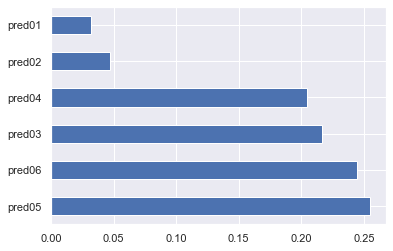

In [202]:
#class01 feature importance treeclassifier model
feat_importances = pd.Series(model1.feature_importances_, index=df_train.columns)
feat_importances.nlargest(7).plot(kind='barh')
plt.show()

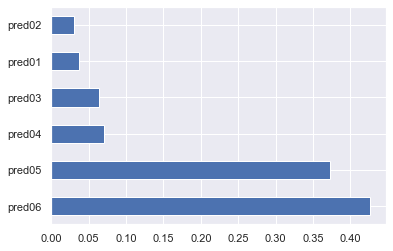

In [203]:
feat_importances = pd.Series(model2.feature_importances_, index=df_train.columns)
feat_importances.nlargest(7).plot(kind='barh')
plt.show()

In general, the idea of random forests is to reduce the variance of the predictions while retaining
low bias by averaging over many noisy trees.
The scatter plot showed that the data has outliers and is not on same scale. Using A tree based approach is prone to outliers and scaling.

After, the above analysis, I took into consideration the correlation heat map and the feature importance extracted from Tree Based classifier and chose following features for the random forest.
'pred05','pred06','pred03','pred04'.

Although Pred02 seems good feature but for Random forest rule based appraoch it was not a favourable choice.
By experimentaion I observed that 'pred02' isn't adding to my model.